<a href="https://colab.research.google.com/github/Katy-Kittivibul/us-inflation-prediction/blob/main/US_Macroeconomic_Inflation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inflation Rate Prediction**

This study will focus on analysis of inflation rate in the US during 2002-2022 to understand how macroeconomic factors affect to the inflation in the US.


The data visualisation using some package such as matplot, seaborn, and plotly, will be use to visually analyse the relationship between inflation rate and macroeconomic features. This will provide insight details for making business and monetary policy decisions.

An ARIMA model has been selected for the machine learning approach.

Feature definition
* UNRATE(%) = Unemployment Rate of US for particular month
* CONSUMER CONF INDEX = Consumer Confidence Index provided by Conference Board
* PPI-CONST MAT = Producers Purchase Index- Construction Materials
* CPIALLITEMS = Consumer Price Index- All Items for the US
* INFLATION(%) = Inflation rate in the US
* MORTGAGE INT. MONTHLY AVG(%) = Average Mortgage interest rate of all Weeks of a particular month
* MED HOUSEHOLD INCOME = Median Household Income in the US
* CORP. BOND YIELD(%)
* MONTHLY HOME SUPPLY
* % SHARE OF WORKING POPULATION = Share of Population between the age 18 and 60
* GDP PER CAPITA
* QUARTERLY REAL GDP
* QUARTERLY GDP GROWTH RATE (%)
* CSUSHPISA = S&P/Case-Shiller U.S. National Home Price Index given by FRED







Dataset link: https://www.kaggle.com/datasets/sagarvarandekar/macroeconomic-factors-affecting-us-housing-prices/data

## Import package

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [31]:
# Time Series Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf, acf

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

## Import data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sagarvarandekar/macroeconomic-factors-affecting-us-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sagarvarandekar/macroeconomic-factors-affecting-us-housing-prices/versions/1


In [4]:
# List files in the directory

files = os.listdir(path)
print("Files in the dataset folder:", files)

for file in files:
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        print(f"Reading file: {dataset_path}")

        # Load the CSV file into a DataFrame
        data = pd.read_csv(dataset_path)

Files in the dataset folder: ['DATA.csv']
Reading file: /root/.cache/kagglehub/datasets/sagarvarandekar/macroeconomic-factors-affecting-us-housing-prices/versions/1/DATA.csv


## Data cleaning

In [5]:
data.head()

,DATE,UNRATE(%),CONSUMER CONF INDEX,PPI-CONST MAT.,CPIALLITEMS,INFLATION(%),MORTGAGE INT. MONTHLY AVG(%),MED HOUSEHOLD INCOME,CORP. BOND YIELD(%),MONTHLY HOME SUPPLY,% SHARE OF WORKING POPULATION,GDP PER CAPITA,QUARTERLY REAL GDP,QUARTERLY GDP GROWTH RATE (%),CSUSHPISA
0,01-05-2022,3.6,106.4,352.857,123.322800,8.581511,5.2300,NaN,4.13,8.4,NaN,74737,19699.465,-0.144227,120.724
1,01-04-2022,3.6,107.3,343.730,121.978170,8.258629,4.9825,NaN,3.76,8.4,NaN,74737,19699.465,-0.144227,121.813
2,01-03-2022,3.6,107.2,345.852,121.301004,8.542456,4.1720,NaN,3.43,7.0,NaN,73289,19727.918,-0.395692,122.888
3,01-02-2022,3.8,110.5,343.583,119.702806,7.871064,3.7625,NaN,3.25,6.0,NaN,73289,19727.918,-0.395692,123.831
4,01-01-2022,4.0,113.8,345.742,118.619339,7.479872,3.4450,NaN,2.93,5.7,NaN,73289,19727.918,-0.395692,124.780


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           241 non-null    object 
 1   UNRATE(%)                      241 non-null    float64
 2   CONSUMER CONF INDEX            241 non-null    float64
 3   PPI-CONST MAT.                 241 non-null    float64
 4   CPIALLITEMS                    241 non-null    float64
 5   INFLATION(%)                   241 non-null    float64
 6   MORTGAGE INT. MONTHLY AVG(%)   241 non-null    float64
 7   MED HOUSEHOLD INCOME           224 non-null    float64
 8   CORP. BOND YIELD(%)            241 non-null    float64
 9   MONTHLY HOME SUPPLY            241 non-null    float64
 10  % SHARE OF WORKING POPULATION  236 non-null    float64
 11  GDP PER CAPITA                 241 non-null    int64  
 12  QUARTERLY REAL GDP             241 non-null    flo

In [7]:
data.isnull().sum()

,0
DATE,0
UNRATE(%),0
CONSUMER CONF INDEX,0
PPI-CONST MAT.,0
CPIALLITEMS,0
INFLATION(%),0
MORTGAGE INT. MONTHLY AVG(%),0
MED HOUSEHOLD INCOME,17
CORP. BOND YIELD(%),0
MONTHLY HOME SUPPLY,0


In [8]:
# Calculate the mean excluding NaN values
mean_income = data["MED HOUSEHOLD INCOME"].mean()
mean_workpop = data["% SHARE OF WORKING POPULATION"].mean()

# Replace Null values with the mean
data["MED HOUSEHOLD INCOME"].fillna(mean_income, inplace=True)
data["% SHARE OF WORKING POPULATION"].fillna(mean_workpop, inplace=True)

<ipython-input-8-de69cc364344>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["MED HOUSEHOLD INCOME"].fillna(mean_income, inplace=True)
<ipython-input-8-de69cc364344>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [9]:
data.isnull().sum()

,0
DATE,0
UNRATE(%),0
CONSUMER CONF INDEX,0
PPI-CONST MAT.,0
CPIALLITEMS,0
INFLATION(%),0
MORTGAGE INT. MONTHLY AVG(%),0
MED HOUSEHOLD INCOME,0
CORP. BOND YIELD(%),0
MONTHLY HOME SUPPLY,0


In [10]:
data.columns

Index(['DATE', 'UNRATE(%)', 'CONSUMER CONF INDEX', 'PPI-CONST MAT.',
       'CPIALLITEMS', 'INFLATION(%)', 'MORTGAGE INT. MONTHLY AVG(%)',
       'MED HOUSEHOLD INCOME', 'CORP. BOND YIELD(%)', 'MONTHLY HOME SUPPLY',
       '% SHARE OF WORKING POPULATION', 'GDP PER CAPITA', 'QUARTERLY REAL GDP',
       'QUARTERLY GDP GROWTH RATE (%)', 'CSUSHPISA'],
      dtype='object')

In [11]:
data.head(10)

,DATE,UNRATE(%),CONSUMER CONF INDEX,PPI-CONST MAT.,CPIALLITEMS,INFLATION(%),MORTGAGE INT. MONTHLY AVG(%),MED HOUSEHOLD INCOME,CORP. BOND YIELD(%),MONTHLY HOME SUPPLY,% SHARE OF WORKING POPULATION,GDP PER CAPITA,QUARTERLY REAL GDP,QUARTERLY GDP GROWTH RATE (%),CSUSHPISA
0,01-05-2022,3.6,106.4,352.857,123.322800,8.581511,5.2300,53273.982143,4.13,8.4,66.410104,74737,19699.465,-0.144227,120.724
1,01-04-2022,3.6,107.3,343.730,121.978170,8.258629,4.9825,53273.982143,3.76,8.4,66.410104,74737,19699.465,-0.144227,121.813
2,01-03-2022,3.6,107.2,345.852,121.301004,8.542456,4.1720,53273.982143,3.43,7.0,66.410104,73289,19727.918,-0.395692,122.888
3,01-02-2022,3.8,110.5,343.583,119.702806,7.871064,3.7625,53273.982143,3.25,6.0,66.410104,73289,19727.918,-0.395692,123.831
4,01-01-2022,4.0,113.8,345.742,118.619339,7.479872,3.4450,53273.982143,2.93,5.7,66.410104,73289,19727.918,-0.395692,124.780
5,01-12-2021,3.9,115.8,335.032,117.629537,7.036403,3.0980,53273.982143,2.65,5.6,64.924129,72171,19806.290,1.680778,125.734
6,01-11-2021,4.2,109.5,328.940,117.269225,6.809003,3.0675,53273.982143,2.62,6.2,64.924129,72171,19806.290,1.680778,126.669
7,01-10-2021,4.6,113.8,322.120,116.695849,6.221869,3.0675,53273.982143,2.68,6.9,64.924129,72171,19806.290,1.680778,127.622
8,01-09-2021,4.7,109.3,317.136,115.734314,5.390349,2.9000,53273.982143,2.53,6.1,64.924129,69824,19478.893,0.570948,128.461
9,01-08-2021,5.2,113.8,313.083,115.420835,5.251272,2.8425,53273.982143,2.55,6.5,64.924129,69824,19478.893,0.570948,129.355


In [15]:
# Check date
print(data['DATE'].head())

0    01-05-2022
1    01-04-2022
2    01-03-2022
3    01-02-2022
4    01-01-2022
Name: DATE, dtype: object


In [16]:
# Change date to datetime
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True) # set DD/MM/YYYY
data.set_index('DATE', inplace=True)
print(data)

            UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
DATE                                                                      
2022-05-01        3.6                106.4         352.857   123.322800   
2022-04-01        3.6                107.3         343.730   121.978170   
2022-03-01        3.6                107.2         345.852   121.301004   
2022-02-01        3.8                110.5         343.583   119.702806   
2022-01-01        4.0                113.8         345.742   118.619339   
...               ...                  ...             ...          ...   
2002-09-01        5.7                 94.5         145.400    76.365830   
2002-08-01        5.7                 97.4         145.100    76.239257   
2002-07-01        5.8                106.3         144.700    75.986111   
2002-06-01        5.8                110.3         144.300    75.901729   
2002-05-01        5.8                108.5         143.800    75.859538   

            INFLATION(%)

In [68]:
data = data.sort_values('DATE')
print(data)

            UNRATE(%)  CONSUMER CONF INDEX  PPI-CONST MAT.  CPIALLITEMS  \
DATE                                                                      
2002-05-01        5.8                108.5         143.800    75.859538   
2002-06-01        5.8                110.3         144.300    75.901729   
2002-07-01        5.8                106.3         144.700    75.986111   
2002-08-01        5.7                 97.4         145.100    76.239257   
2002-09-01        5.7                 94.5         145.400    76.365830   
...               ...                  ...             ...          ...   
2022-01-01        4.0                113.8         345.742   118.619339   
2022-02-01        3.8                110.5         343.583   119.702806   
2022-03-01        3.6                107.2         345.852   121.301004   
2022-04-01        3.6                107.3         343.730   121.978170   
2022-05-01        3.6                106.4         352.857   123.322800   

            INFLATION(%)

In [69]:
# Check inf values
if np.isinf(data).values.any():
    print("DataFrame contains inf values")
else:
    print("No inf values in DataFrame")

No inf values in DataFrame


## Exploratory Data Analysis

In [71]:
data.describe().T.style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
UNRATE(%),241.000000,6.074689,1.987058,3.500000,4.700000,5.600000,7.300000,14.700000
CONSUMER CONF INDEX,241.000000,90.809544,25.871004,25.000000,70.400000,94.500000,108.200000,138.400000
PPI-CONST MAT.,241.000000,206.949863,40.479900,143.800000,183.300000,206.200000,221.700000,352.857000
CPIALLITEMS,241.000000,95.539665,11.087025,75.859538,87.722400,96.819215,103.255463,123.322800
INFLATION(%),241.000000,2.296497,1.641645,-2.097161,1.463784,2.070508,2.969762,8.581511
MORTGAGE INT. MONTHLY AVG(%),241.000000,4.697956,1.119850,2.684000,3.802500,4.457500,5.812500,6.806000
MED HOUSEHOLD INCOME,241.000000,53273.982143,7205.708458,42409.000000,49276.000000,51017.000000,56516.000000,68703.000000
CORP. BOND YIELD(%),241.000000,4.471162,1.079004,2.140000,3.690000,4.340000,5.410000,6.750000
MONTHLY HOME SUPPLY,241.000000,5.974274,1.895763,3.300000,4.600000,5.500000,6.700000,12.200000
% SHARE OF WORKING POPULATION,241.000000,66.410104,0.794510,64.924129,65.880715,66.593595,67.118989,67.298433


array([[<Axes: title={'center': 'UNRATE(%)'}>,
        <Axes: title={'center': 'CONSUMER CONF INDEX'}>,
        <Axes: title={'center': 'PPI-CONST MAT.'}>,
        <Axes: title={'center': 'CPIALLITEMS'}>,
        <Axes: title={'center': 'INFLATION(%)'}>,
        <Axes: title={'center': 'MORTGAGE INT. MONTHLY AVG(%)'}>,
        <Axes: title={'center': 'MED HOUSEHOLD INCOME'}>,
        <Axes: title={'center': 'CORP. BOND YIELD(%)'}>,
        <Axes: title={'center': 'MONTHLY HOME SUPPLY'}>,
        <Axes: title={'center': '% SHARE OF WORKING POPULATION'}>,
        <Axes: title={'center': 'GDP PER CAPITA'}>,
        <Axes: title={'center': 'QUARTERLY REAL GDP'}>,
        <Axes: title={'center': 'QUARTERLY GDP GROWTH RATE (%)'}>,
        <Axes: title={'center': 'CSUSHPISA'}>]], dtype=object)

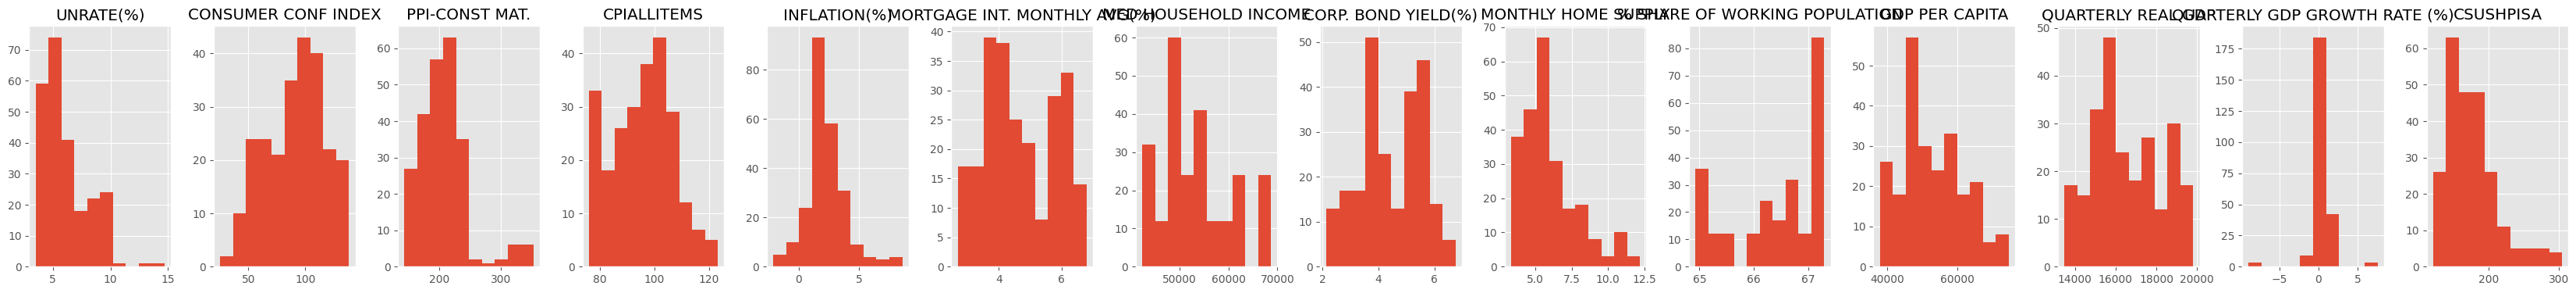

In [72]:
# Check data distribution. According to the datasheet, all features have already been normalized in the range between 0 to 1.
columns = ['UNRATE(%)', 'CONSUMER CONF INDEX', 'PPI-CONST MAT.',
       'CPIALLITEMS', 'INFLATION(%)', 'MORTGAGE INT. MONTHLY AVG(%)',
       'MED HOUSEHOLD INCOME', 'CORP. BOND YIELD(%)', 'MONTHLY HOME SUPPLY',
       '% SHARE OF WORKING POPULATION', 'GDP PER CAPITA', 'QUARTERLY REAL GDP',
       'QUARTERLY GDP GROWTH RATE (%)', 'CSUSHPISA']
data[columns].hist(layout=(1, len(columns)), figsize=(3*len(columns), 4))

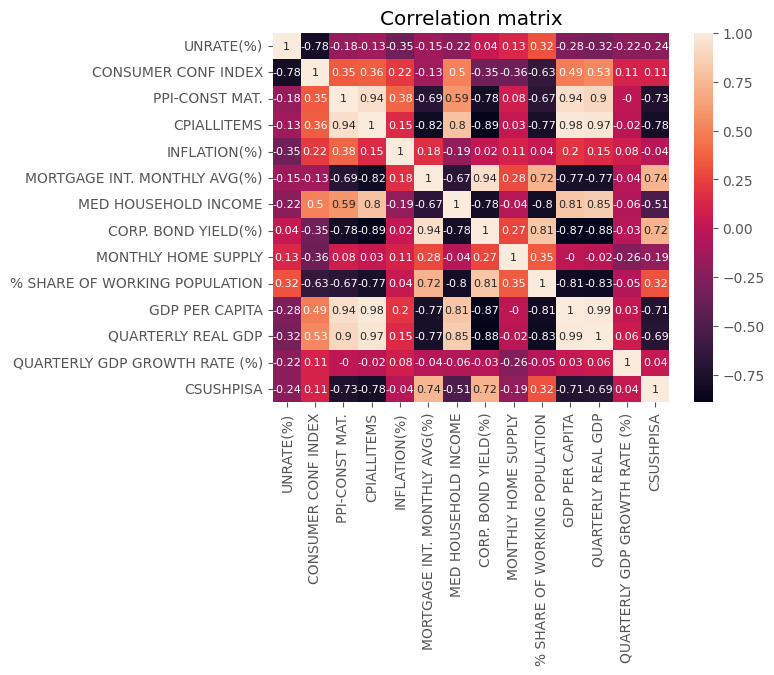

In [73]:
# Correlation matrix
corr_matrix = data[columns].corr().round(2)
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":8})
plt.title('Correlation matrix')
plt.show()

Text(0, 0.5, 'Inflation Rate')

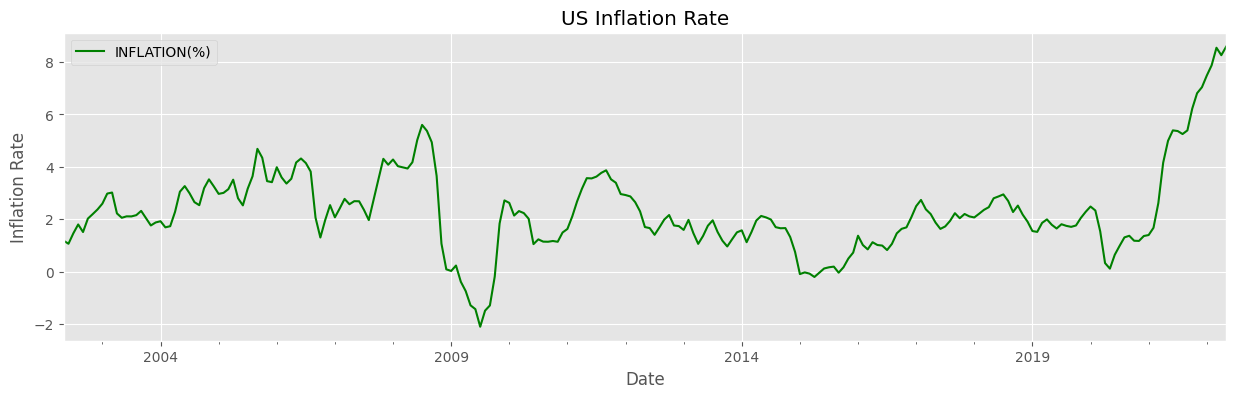

In [74]:
data['INFLATION(%)'].plot(color = 'green', figsize = (15,4))
plt.legend(['INFLATION(%)'])
plt.title('US Inflation Rate')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')

<Axes: ylabel='INFLATION(%)'>

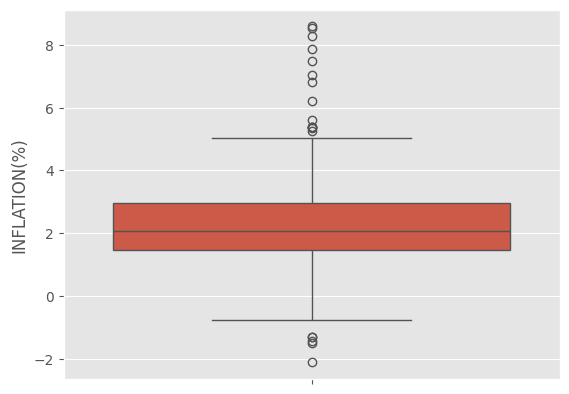

In [75]:
sns.boxplot(data['INFLATION(%)'])

## ARIMA Model

### Find p, d, q values

In ARIMA models, the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are essential tools for identifying the order of the model, which is represented by the (p, d, q) parameters.

First, we calculate stationary to find 'd' in p,d,q parameters using Augmented Dickey–Fuller test. Stationary is a constant value without trend and seasonality.



In [76]:
if data['INFLATION(%)'].isnull().sum() == 0 and np.isinf(data['INFLATION(%)']).sum() == 0:
    result = adfuller(data['INFLATION(%)'])
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
else:
    print("Data still contains NaN or inf values after preprocessing.")

ADF Statistic: -1.1975583664394163
p-value: 0.674645158103195


The results
- ADF Statistic = -3.0265:

- p-value = 0.0325: Since p-value < 0.05, we reject the null hypothesis, meaning the data is likely stationary.

Interpretation
- That means d = 0, because no differencing is needed.
- If the test had shown non-stationarity (p-value > 0.05), you would take the first difference (d = 1) and retest until stationarity is achieved.


If p-value > 0.05, apply differencing.

In [77]:
# if p > 0.05
#data['diff'] = data['INFLATION(%)'].diff().dropna()
#result = adfuller(data['diff'].dropna())
#print("ADF Statistic:", result[0])
#print("p-value:", result[1])

In ARIMA models, the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are essential tools for identifying the order of the model, which is represented by the (p, d, q) parameters.

**Autocorrelation Function (ACF)**: p parameter

- Measures: The correlation between a time series and its lagged values. For example, the ACF at lag 1 measures the correlation between the series at time t and time t-1.
- Interpretation:
  - Decaying slowly: Suggests the presence of an autoregressive (AR) component.
  - Cutting off sharply: Indicates a moving average (MA) component.
  - Significant spikes at certain lags: Points to the potential order of the MA component.

**Partial Autocorrelation Function (PACF)**: q parameter

- Measures: The correlation between a time series and its lagged values, after removing the influence of intermediate lags. This helps isolate the direct relationship between the series at time t and a specific lag.
- Interpretation:
  - Decaying slowly: Suggests the presence of a moving average (MA) component.
  - Cutting off sharply: Indicates an autoregressive (AR) component.
  - Significant spikes at certain lags: Points to the potential order of the AR component.

**Identify Patterns:**

1. AR (p) model:
PACF cuts off after lag p.
ACF decays slowly.
2. MA (q) model:
ACF cuts off after lag q.
PACF decays slowly.
3. ARMA (p, q) model:
Both ACF and PACF decay slowly.

<Figure size 1200x500 with 0 Axes>

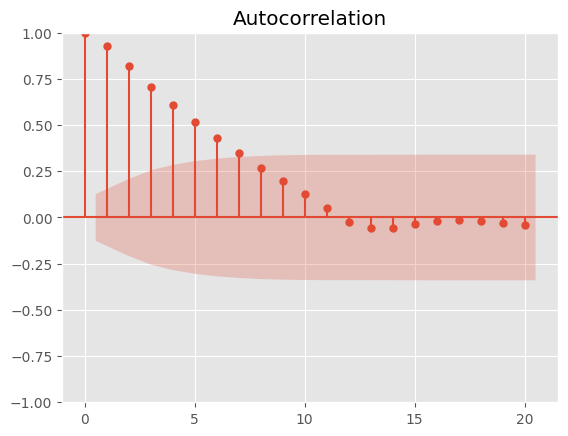

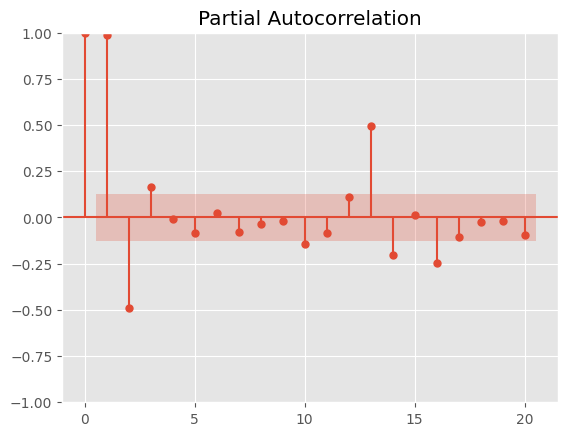

In [78]:
# Plot ACF & PACF (Determine ARIMA (p, d, q))
plt.figure(figsize=(12,5))
plot_acf(data['INFLATION(%)'].dropna(), lags=20)
plot_pacf(data['INFLATION(%)'].dropna(), lags=20, method = 'ols')
plt.show()

These two charts are acf and pacf plots between number of lags (nlags) and time series values with cutoff. For acf graph, acf drops after 10 lags, while pacf remains in the cutoff range.  

In [79]:
# Calculate ACF and PACF values
acf_vals = acf(data['INFLATION(%)'].dropna(), nlags=10, fft = True)
pacf_vals = pacf(data['INFLATION(%)'].dropna(), nlags=20, method='ols')

In [80]:
# Find p (AR order) - first lag where PACF is not significant
p = np.where(np.abs(pacf_vals) < (1.96/np.sqrt(len(data))))[0]
p = p[0] - 1 if len(p) > 0 else 0  # Ensure at least 0

# Find q (MA order) - first lag where ACF is not significant
q = np.where(np.abs(acf_vals) < (1.96/np.sqrt(len(data))))[0]
q = q[0] - 1 if len(q) > 0 else 0  # Ensure at least 0

print(f"Suggested p (AR order): {p}")
print(f"Suggested q (MA order): {q}")

Suggested p (AR order): 3
Suggested q (MA order): 0


* nlags= 20: d = 0, p = 3, q = 10
* nlags = 10: d = 0, p = 3, q = 0

ACF drops after 10 lags,  test q=1 or q=2 and compare AIC/BIC.

### Model training

In [81]:
# ARIMA model
model1 = ARIMA(data['INFLATION(%)'], order=(3, 0, 0)).fit()
model2 = ARIMA(data['INFLATION(%)'], order=(3, 0, 1)).fit()
model3 = ARIMA(data['INFLATION(%)'], order=(3, 0, 10)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

The AIC is used to measure the quality of the model, where lower AIC values indicate a better-fitting model (i.e., one that balances goodness of fit and model complexity).

In [82]:
# Check AIC values
print("AIC for q=0:", model1.aic)
print("AIC for q=1:", model2.aic)
print("AIC for q=10:", model2.aic)

AIC for q=0: 264.3382648325304
AIC for q=1: 266.32463763550476
AIC for q=10: 266.32463763550476


q = 0 gives the lowest AIC values. Choose 'model1' for prediction.

In [83]:
# Print model summary
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:           INFLATION(%)   No. Observations:                  241
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -127.169
Date:                Fri, 14 Feb 2025   AIC                            264.338
Time:                        01:20:02   BIC                            281.762
Sample:                    05-01-2002   HQIC                           271.358
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6233      0.713      3.680      0.000       1.226       4.020
ar.L1          1.5149      0.061     24.929      0.000       1.396       1.634
ar.L2         -0.7101      0.111     -6.413      0.0

In [84]:
print(data.index[-1])

2022-05-01 00:00:00


### Evaluate Model Performance

In [111]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train, test = train_test_split(data['INFLATION(%)'], test_size=0.3, shuffle=False)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Forecast on the test set
predictions = model1.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Calculate MAE and MSE
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R2): {r2:.3f}")

Mean Absolute Error (MAE): 0.249
Mean Squared Error (MSE): 0.112
Root Mean Squared Error (RMSE): 0.335
R-squared (R2): 0.973


### Forecast future inflation rates

In [85]:
# Forecast future inflation rate
forecast_steps = 12  # Forecast for the next 12 months
forecast = model1.forecast(steps=forecast_steps)

# Create Date Index for Forecast
future_dates = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Convert Forecast to DataFrame
forecast_df = pd.DataFrame({'DATE': future_dates, 'Predicted Inflation': forecast})
forecast_df.set_index('DATE', inplace=True)

<ipython-input-85-549e6173644a>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='M')[1:]


In [86]:
print(future_dates)

DatetimeIndex(['2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31'],
              dtype='datetime64[ns]', freq='ME')


In [88]:
print(forecast)

2022-06-01    8.588157
2022-07-01    8.323827
2022-08-01    7.970005
2022-09-01    7.622780
2022-10-01    7.306028
2022-11-01    7.016529
2022-12-01    6.747725
2023-01-01    6.495759
2023-02-01    6.258937
2023-03-01    6.036390
2023-04-01    5.827386
2023-05-01    5.631171
Freq: MS, Name: predicted_mean, dtype: float64


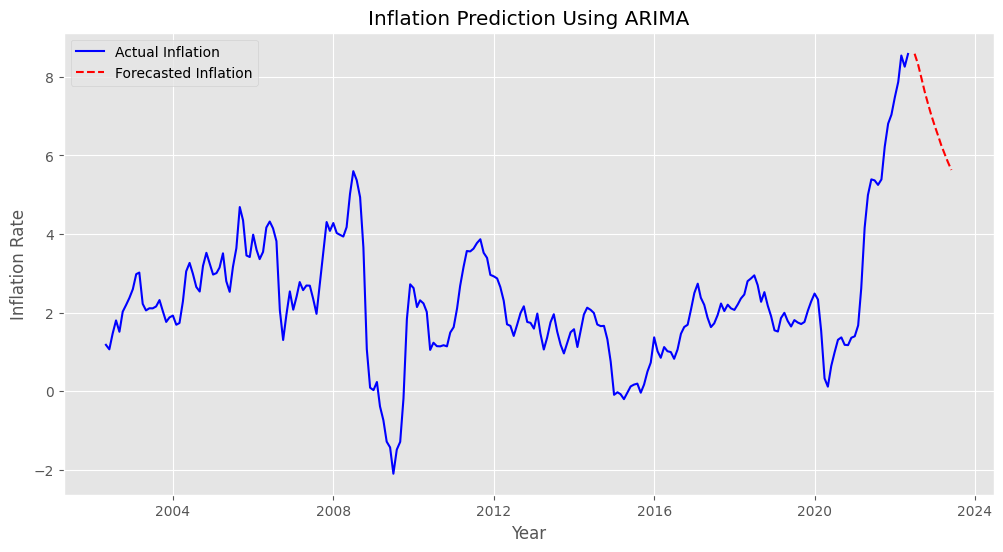

In [87]:
# Plot Results
plt.figure(figsize=(12,6))
plt.plot(data.index, data['INFLATION(%)'], label="Actual Inflation", color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted Inflation'], label="Forecasted Inflation", color='red', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.title("Inflation Prediction Using ARIMA")
plt.legend()
plt.show()

### Compare predicted and actual inflation rates

In [103]:
# Compare predicted and actual future inflation rates.
actual_data = pd.read_excel('actual_US_inflation.xlsx', parse_dates=['DATE'], index_col='DATE')

In [104]:
predicted_data = forecast_df['Predicted Inflation']
comparison_data = pd.DataFrame({'Predicted': predicted_data,
                                'Actual': actual_data['actual inflation']})
comparison_data['Error'] = comparison_data['Predicted'] - comparison_data['Actual']

In [105]:
print(comparison_data)

            Predicted  Actual     Error
DATE                                   
2022-06-30   8.588157     9.1 -0.511843
2022-07-31   8.323827     8.5 -0.176173
2022-08-31   7.970005     8.3 -0.329995
2022-09-30   7.622780     8.2 -0.577220
2022-10-31   7.306028     7.7 -0.393972
2022-11-30   7.016529     7.1 -0.083471
2022-12-31   6.747725     6.5  0.247725
2023-01-31   6.495759     6.4  0.095759
2023-02-28   6.258937     6.0  0.258937
2023-03-31   6.036390     5.0  1.036390
2023-04-30   5.827386     4.9  0.927386
2023-05-31   5.631171     4.0  1.631171


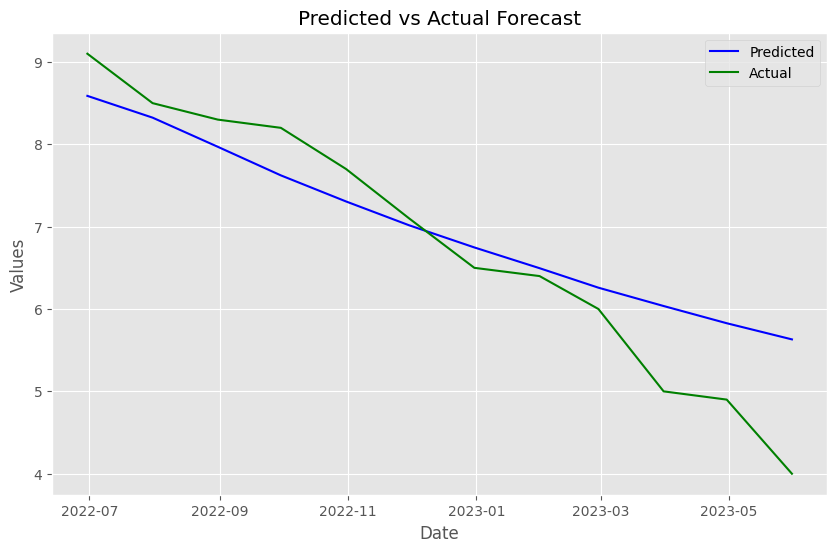

In [106]:
# Plot a chart
plt.figure(figsize=(10, 6))
plt.plot(comparison_data.index, comparison_data['Predicted'], label='Predicted', color='blue')
plt.plot(comparison_data.index, comparison_data['Actual'], label='Actual', color='green')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Predicted vs Actual Forecast')
plt.legend()
plt.show()